Linear isotropic source of γ-quanta (Eₒ=2.5 MeV), coincides with the edge of the base of an iron parallelepiped with a square base. The side of the square is a = 25 cm, H = 15 cm.

Task 1. Construct a "Hedgehog" each needle, which is represented by a segment connecting the point of birth of the γ-quantum with the point of its first interaction.
Task 2. Calculate the flux density distributions of scattered quanta along the symmetry axis of the problem and along the lines using the method of local flux estimation.

In [10]:
from math import *
import numpy as np
import random as rd
import matplotlib.pyplot as plt

In [11]:
def energy_group_num(E):#Возвращает массив номеров К энергетической группы, в соответствии энергии частицы,Е - массив с энергиями частиц(МэВ)
    n = len(E)
    K = [0] * n
    for i in range(n):
        if 0.008 <= E[i] <= 0.01:
            K[i] = 0
        elif 0.01 < E[i] <= 0.015:
            K[i] = 1
        elif 0.015 < E[i] <= 0.02:
            K[i] = 2
        elif 0.02 < E[i] <= 0.03:
            K[i] = 3
        elif 0.03 < E[i] <= 0.04:
            K[i] = 4
        elif 0.04 < E[i] <= 0.05:
            K[i] = 5
        elif 0.05 < E[i] <= 0.06:
            K[i] = 6
        elif 0.06 < E[i] <= 0.08:
            K[i] = 7
        elif 0.08 < E[i] <= 0.1:
            K[i] = 8
        elif 0.1 <= E[i] <= 0.15:
            K[i] = 9
        elif 0.15 < E[i] <= 0.2:
            K[i] = 10
        elif 0.2 < E[i] <= 0.3:
            K[i] = 11
        elif 0.3 < E[i] <= 0.4:
            K[i] = 12
        elif 0.4 < E[i] <= 0.5:
            K[i] = 13
        elif 0.5 < E[i] <= 0.6:
            K[i] = 14
        elif 0.6 < E[i] <= 0.8:
            K[i] = 15
        elif 0.8 < E[i] <= 1:
            K[i] = 16
        elif 1 < E[i] <= 1.5:
            K[i] = 17
        elif 1.5 < E[i] <= 2:
            K[i] = 18
        elif 2 < E[i] <= 3:
            K[i] = 19
        else:
            print('Энергия частица вышла за пределы. E =', E[i])

    return K

#Разыгрывает координаты точек рождения (x0, y0,z0) для n частиц на источнике в виде ребра квадрата со стороной а = 25 см
#Также возвращает массив начальных энергий E
def generate_birthpoitns(n):
    x0 = [0] * n
    y0 = [-12.5] * n
    z0 = [0] * n
    G = [rd.uniform(0, 25) for i in range(n)]
    for i in range(n):
        x0[i]=G[i]
    E = [2.5] * n
    return x0, y0, z0, E

def generate_1stInteraction_pts(x0, y0, z0, E):#Вычисляет координаты 1ого взаимодействия частиц.х0,у0,z0-списки координат частиц.E энергия частиц
    n = len(x0)# Число частиц
    K = energy_group_num(E)# Номера энерг-х групп для частиц
    # Координаты точек первого взаимодействия:
    x1 = [0] * n
    y1 = [0] * n 
    z1 = [0] * n
    omega1 = [[0, 0, 0] for i in range(n)]
    G1 = [rd.uniform(0, 1) for i in range(n)] 
    G2 = [rd.uniform(0, 1) for i in range(n)] 
    G3 = [rd.uniform(0, 1) for i in range(n)]
    for i in range(n):
        L = -log(G1[i]) / SIGMA[K[i]] # Длина своб. пробега
        psi = 2 * pi * G2[i] 
        theta = pi / 2 * G3[i]
        if (L * cos(theta) * sin(psi))>=0 & 0<=(x0[i] + L * cos(theta) * cos(psi))<=25:
            x1[i] = x0[i] + L * cos(theta) * cos(psi)
            y1[i] = y0[i] + L * cos(theta) * sin(psi)
            z1[i] = z0[i] + L * sin(theta)
            omega1[i][0] = (x1[i] - x0[i]) / L
            omega1[i][1] = (y1[i] - y0[i]) / L
            omega1[i][2] = (z1[i] - z0[i]) / L
        else: 
            i-=1
    return x1, y1, z1, omega1

def solution_area_pts(x1, y1, z1, omega1, E1):#Возвращает координаты частиц x,y,z,которые остались в области решения задачи,и их энергию E
    x = []
    y = []
    z = []
    omega = [] 
    E = []
    n0 = len(x1)
    
    for i in range(n0):
        if abs(x1[i]) <= 25 and abs(y1[i]) <= 25 and 0 <= z1[i] <= 15: 
            x.append(x1[i])
            y.append(y1[i])
            z.append(z1[i]) 
            omega.append(omega1[i]) 
            E.append(E1[i])
    n_out = n0 - len(x)
    print('Из области вылетело', n_out, 'частиц.') 
    return x, y, z, omega, E

def generate_interaction_type(x1, y1, z1, omega1, E1):#Розыгрыш типа взаимодействия.Возвращает координаты частиц x,y,z,для которых произошло комптоновское рассеяние,их энергию E;число частиц n_ph,участвующих в фотоэффекте;число частиц n_pair,участ-их в образовании электронно-позитронной пары
    K = energy_group_num(E1)# Номера энергетических групп для частиц
    
    n0 = len(x1)
    G = [rd.uniform(0, 1) for i in range(n0)] 
    x = []
    y = []
    z = []
    omega = [] 
    E = []
    n_ph = 0
    n_pair = 0
    for i in range(n0):
        if sig_comp[K[i]] / SIGMA[K[i]] >= G[i]:
            # Произошло компт-ое рассеяние 
            x.append(x1[i])
            y.append(y1[i])
            z.append(z1[i]) 
            omega.append(omega1[i]) 
            E.append(E1[i])
        elif (sig_comp[K[i]] + sig_ph[K[i]]) / SIGMA[K[i]] >= G[i]:
            # Фотоэффект
            n_ph += 1
        else: # Электронно-позитронная пара
            n_pair += 1

    print('В фотоэффекте участвовало', n_ph, 'частиц.')
    print('В образовании электронно-позитронной пары участвовало', n_pair,'частиц.')

    return x, y, z, omega, E

def scattered_photon_params(E0):#Рассчитывает энергию Е и косинус угла cos_theta рассеяния фотона.E0 - список энергий частиц
    n = len(E0)# Число частиц
    # mc2 - энергия покоя электрона, МэВ.
    E = [0] * n
    cos_theta = [0] * n
    for i in range(n): 
        alpha1 = E0[i] / mc2 
        flag = True
        j = 0
        while flag and j < 10:
            G1 = rd.uniform(0, 1) 
            G2 = rd.uniform(0, 1)
            x = alpha1 * (1 + 2 * alpha1 * G1) / (1 + 2 * alpha1)
            p = x / alpha1 + alpha1 / x + (1 / alpha1 - 1 / x) * (2 + 1 / alpha1 - 1 / x)
            if G2 * (1 + 2 * alpha1 + 1 / (1 + 2 * alpha1)) < p:
                E[i] = x * mc2
                cos_theta[i] = 1 - 1 / x + 1 / alpha1 
                flag = False
        if j > 0:
            print('scattered_photon_params ' + 'Число итераций при расчете параметров в while', j)

    return E, cos_theta


def expulsion_small_energy(x1, y1, z1, omega1, E1, cos_theta1, W1):#Оставляет только частицы с энергией E>0.1 МэВ
    n = len(E1)
    x = []
    y = []
    z = []
    omega = [] 
    E = []
    cos_theta = [] 
    W = []
    
    for i in range(n):
        if E1[i] > 0.1:
            x.append(x1[i])
            y.append(y1[i])
            z.append(z1[i]) 
            omega.append(omega1[i]) 
            E.append(E1[i]) 
            cos_theta.append(cos_theta1[i]) 
            W.append(W1[i])
    print('Убрано частиц с E <= 0.1 МэВ:', n - len(E))
    
    return x, y, z, omega, E, cos_theta, W


def statistical_weight(E, W):#рассчитывает статистический вес W частицы
    n = len(E)
    K = energy_group_num(E)# Номера энергетических групп для частиц
    for i in range(n):
        W[i] = W[i] * sig_comp[K[i]] / SIGMA[K[i]]
    return W


def expulsion_small_weight(x1, y1, z1, omega1, E1, cos_theta1, W1):#Оставляет только частицы со стат.весом W > 1e-11
    n = len(W1)
    x = []
    y = []
    z = []
    omega = [] 
    E = []
    cos_theta = [] 
    W = []
    for i in range(n):
        if W1[i] > 1e-11:
            x.append(x1[i])
            y.append(y1[i])
            z.append(z1[i]) 
            omega.append(omega1[i]) 
            E.append(E1[i]) 
            cos_theta.append(cos_theta1[i]) 
            W.append(W1[i])
    print('Убрано частиц с W <= 1e-11:', n - len(W))

    return x, y, z, omega, E, cos_theta, W


def eta_calculation(alpha, u, w, k, xi, yi, zi, rd: tuple):#Вычисляет один вклад в Eta
    sig_c_up =  Z * r_e ** 2 / 2 / (1 + alpha * (1 - u)) ** 2 * (1 +u ** 2 + alpha** 2 * (1 - u) ** 2 / (1 +alpha * (1 - u)))
    sig_c_down = 2 * pi * Z * r_e ** 2 * ((1 + alpha) / alpha ** 2 * (2 * (1 + alpha) / (1 + 2 * alpha) -log(1 + 2 * alpha) / alpha) + log(1 + 2 * alpha) / 2 / alpha - (1 +3 * alpha) / (1 + 2 * alpha) ** 2)
    W_x_sigc = w * sig_c_up / sig_c_down
    SigmaRho = SIGMA[k]
    delta_r2 = ((xi - rd[0]) ** 2 + (yi - rd[1]) ** 2 + (zi - rd[2]) ** 2)
    Eta = (W_x_sigc * exp(-SigmaRho * sqrt(delta_r2)) / delta_r2)
    
    return Eta


def detector_readings(x, y, z, E, cos_theta, W):#Вычисляет виртуальные вклады в показание детектора
    K = energy_group_num(E)# Номера энергетических групп для частиц
    n = len(x)# Число частиц
    Eta1 = [0] * 20
    Eta2 = [0] * 20
    Eta3 = [0] * 20
    for i in range(n): 
        alpha = E[i] / mc2 
        u = cos_theta[i]
        Eta1[K[i]] += eta_calculation(alpha, u, W[i], K[i], x[i],y[i], z[i], rd1)
        Eta2[K[i]] += eta_calculation(alpha, u, W[i], K[i], x[i],y[i], z[i], rd2)
        Eta3[K[i]] += eta_calculation(alpha, u, W[i], K[i], x[i],y[i], z[i], rd3)
    return Eta1, Eta2, Eta3


def generate_newInteraction_pts(x1, y1, z1, omega1, E, cos_theta):#Вычисляет координаты следующего взаимодействия частиц
    n = len(x1)
    omega = [[0, 0, 0] for i in range(n)]
    G1 = [rd.uniform(0, 1) for i in range(n)] 
    G2 = [rd.uniform(0, 1) for i in range(n)] 
    K = energy_group_num(E)# Номера энерг-х групп для частиц
    # rho - плотность алюминия, г/см^3
    # Координаты точек следующего взаимодействия:
    x0 = [0] * n 
    y0 = [0] * n 
    z0 = [0] * n
    for i in range(n):
        u = cos_theta[i]
        psi = pi * G1[i]#2*
        omega[i][2] = omega1[i][2] * u + sqrt((1 - u ** 2) *(1 - omega1[i][2] ** 2)) *cos(psi)
        omega[i][1] = (omega1[i][1] * (u - omega1[i][2] * omega[i][2]) + omega1[i][0] * sin(psi) * sqrt((1 - u ** 2) *(1 - omega1[i][2] ** 2)))/ (1 - omega1[i][2] ** 2)
        omega[i][0] = (omega1[i][0] * (u - omega1[i][2] * omega[i][2]) - omega1[i][1] * sin(psi) * sqrt((1 - u ** 2) *(1 - omega1[i][2] ** 2)))/ (1 - omega1[i][2] ** 2)
        L = -log(G2[i]) / SIGMA[K[i]] # Длина своб. пробега
        x0[i] = x1[i] + L * omega[i][0]
        y0[i] = y1[i] + L * omega[i][1]
        z0[i] = z1[i] + L * omega[i][2]
        if (x0[i])<=0 or (x0[i])>=25 or abs(y0[i])<=12.5:
            i-=1
        else:
            i+=1
    return x0, y0, z0, omega


def plot_diagram(phi, det_title: str):#Выводит диаграмму плотности потока чатиц для различных энергетических групп.
    labels = ['0.01', ' 0.015', '0.02', '0.03', '0.04', ' 0.05', '0.06', ' 0.08', '0.1', '0.15', '0.2','0.3', '0.4', '0.5', '0.6', '0.8', '1', '1.5', '2', '2.5', '3,Мэв']
    phi.append(0)
    x = [0.01, 0.015, 0.02, 0.03, 0.04, 0.05, 0.06, 0.08, 0.1, 0.15, 0.2, 0.3, 0.4, 0.5, 0.6, 0.8, 1, 1.5, 2, 2.5, 3]
    width = [0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1,0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0]
    fig, ax = plt.subplots(figsize=(8, 4))
    rect = ax.bar(x, phi, width, align='edge', label='Плотность потока частиц для разных энергетических групп',edgecolor='black')

    ax.set_ylabel(r'$\varphi, см^{-2}$') 
    ax.set_title(det_title) 
    ax.set_xticks(x) 
    ax.set_xticklabels(labels) 
    ax.legend()
    fig.tight_layout()


def trajectories(x0, y0, z0, x1, y1, z1):#Рисует траекторию частицы между взаимодйствиями
    n0 = len(x0)
    for i in range(n0):
        ax.scatter(x1[i], y1[i], z1[i], c='g', s=1) 
        ax.plot([x0[i], x1[i]], [y0[i], y1[i]], [z0[i], z1[i]])


Рождение 1000 частиц.


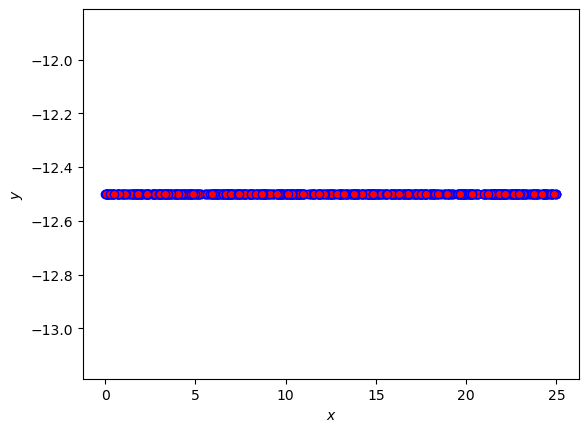

Из области вылетело 35 частиц.
В области осталось 965 частиц.
1 взаимодействие:
В фотоэффекте участвовало 0 частиц.
В образовании электронно-позитронной пары участвовало 614 частиц.
Рассеялось 351 частиц.
Убрано частиц с E <= 0.1 МэВ: 0
Убрано частиц с W <= 1e-11: 0
Из области вылетело 0 частиц.
В области осталось 351 частиц.
1 взаимодействие:
В фотоэффекте участвовало 4 частиц.
В образовании электронно-позитронной пары участвовало 214 частиц.
Рассеялось 133 частиц.
Убрано частиц с E <= 0.1 МэВ: 0
Убрано частиц с W <= 1e-11: 0
Из области вылетело 0 частиц.
В области осталось 133 частиц.
1 взаимодействие:
В фотоэффекте участвовало 4 частиц.
В образовании электронно-позитронной пары участвовало 80 частиц.
Рассеялось 49 частиц.
Убрано частиц с E <= 0.1 МэВ: 0
Убрано частиц с W <= 1e-11: 0
Из области вылетело 0 частиц.
В области осталось 49 частиц.
1 взаимодействие:
В фотоэффекте участвовало 1 частиц.
В образовании электронно-позитронной пары участвовало 27 частиц.
Рассеялось 21 частиц.
Уб

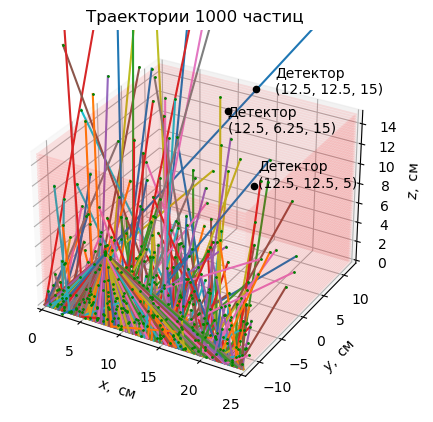

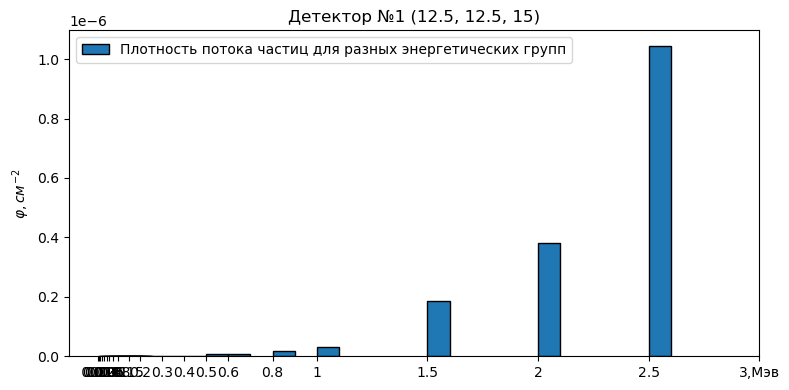

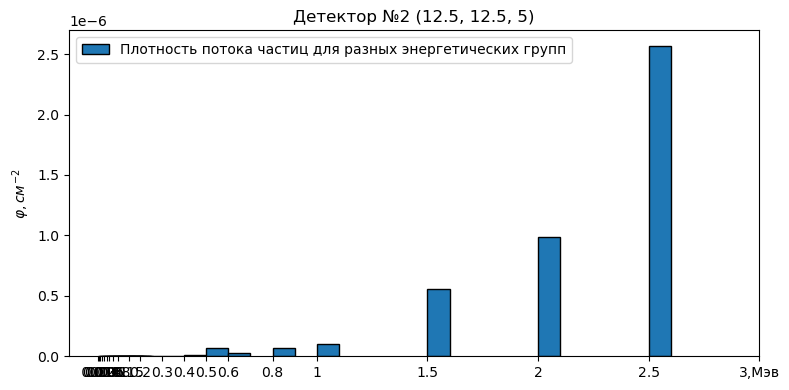

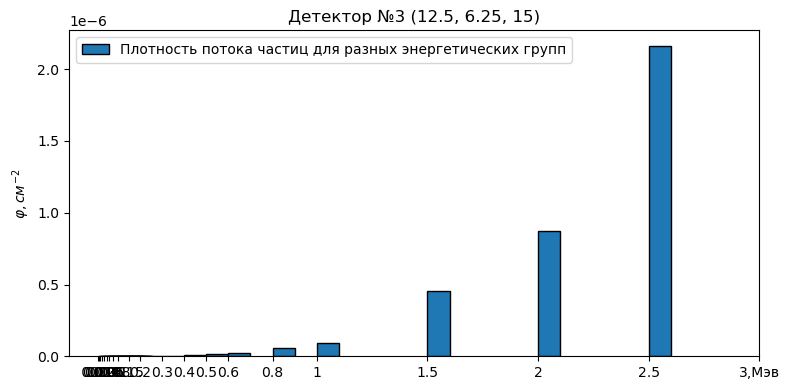

In [13]:
# Кортежи значений сечений взаимодействий фотонов 
# различных энергий для железа, [см^2/г].
# Значение элемента кортежа с индексом i соответствует 
# энергетической группе с номером i (K[j] = i). 
sig_comp = (0.181, 0.180, 0.177, 0.174, 0.167, 0.162,0.157, 0.153, 0.144, 0.138, 0.124, 0.114,0.0991, 0.0887, 0.0811, 0.0749, 0.0659, 0.0592, 0.0481, 0.0410, 0.0322)
sig_ph =(315,169,54,24.3,7.73,3.32,1.68,0.96,0.404,0.204,0.0591,0.0245,0.00722,0.00327,0.00181,0.00115,0.000582,0.000354,0.000162,0.0001,0.00054)
sig_pair = (0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000345,0.00133,0.00371)
SIGMA = [0] * 20

for i in range(len(SIGMA)):
    SIGMA[i] = (sig_comp[i] + sig_ph[i] + sig_pair[i]) * 2.7

n = 1000# Число частиц
mc2 = 0.51099# Энергия покоя электрона, МэВ
Z = 26# Атомный номер железа
rho = 7.87# Плотность железа, г/см^3
r_e = 2.8e-13# Kлассический радиус электрона

rd1 = (12.5, 12.5, 15)
rd2 = (12.5, 12.5, 5)
rd3 = (12.5, 6.25, 15)

W = [1] * n # Начальный стат. вес частиц
# размер перепишется в проверке на E > Emin 

x0, y0, z0, E = generate_birthpoitns(n)
print('Рождение', len(x0), 'частиц.')

x1, y1, z1, omega1 = generate_1stInteraction_pts(x0, y0, z0, E)


plt.scatter(x=x0, y=y0, marker='o', c='r', edgecolor='b')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()

# область
fig = plt.figure()
ax = plt.axes(projection='3d')

ax.set_xlim(0, 25)
ax.set_ylim(-12.5, 12.5)
ax.set_zlim(0, 15)

# начальные траектории
trajectories(x0, y0, z0, x1, y1, z1)

# Параллелепипед
a = 25
b = 25
c = 15
h = 0.25
x = [0, 0, 25, 25, 0]
y = [-12.5, 12.5, 12.5, -12.5, -12.5]
z = np.arange(0, 15 + h, h)

i = np.linspace(0, 25, 100)
j = np.linspace(0, 25, 100) 
X0, Y0 = np.meshgrid(i, j)

for i in z:
    ax.plot(x, y, i, color='r', alpha=0.1)

#детекторы

ax.scatter(12.5, 12.5, 15, c='k')
ax.scatter(12.5, 12.5, 5, c='k')
ax.scatter(12.5, 6.25, 15, c='k')

ax.text(15, 12.5, 15, "Детектор\n(12.5, 12.5, 15)")
ax.text(13, 12.5, 5, "Детектор\n(12.5, 12.5, 5)")
ax.text(12, 7, 12.5, "Детектор\n(12.5, 6.25, 15)")

# Показания детекторов с учетом всех взаимодействий
 
totEta1 = [0] * 20
totEta2 = [0] * 20
totEta3 = [0] * 20

j = 0
while j < 100:
    x1, y1, z1, omega1, E = solution_area_pts(x1, y1, z1, omega1, E)
    if len(x1) < 1:
        break
    print('В области осталось', len(x1), 'частиц.') 
    print(j + 1, 'взаимодействие:')
    x1, y1, z1, omega1, E = generate_interaction_type(x1, y1, z1, omega1, E) 
    print('Рассеялось', len(x1), 'частиц.')
    if len(x1) < 1:
        break
    E, cos_theta = scattered_photon_params(E)
    x1, y1, z1, omega1, E, cos_theta, W = expulsion_small_energy(x1, y1, z1,omega1, E,cos_theta, W)
    if len(x1) < 1:
        break
    W1 = statistical_weight(E, W)
    x1, y1, z1, omega1, E, cos_theta, W1 = expulsion_small_weight(x1, y1, z1,omega1, E,cos_theta, W1)
    if len(x1) < 1:
        break
    (Eta1, Eta2, Eta3) = detector_readings(x1, y1, z1, E, cos_theta, W1)
    for i in range(20): 
        totEta1[i] += Eta1[i] 
        totEta2[i] += Eta2[i]
        totEta3[i] += Eta3[i]
    x0, y0, z0, omega1 = generate_newInteraction_pts(x1, y1, z1, omega1, E, cos_theta)
    
    if (x0[j])<0 or (x0[j])>25 or abs(y0[j])<12.5:
        j-=1
    else:
        trajectories(x1, y1, z1, x0, y0, z0) 
        x1, y1, z1 = x0, y0, z0
    
    j += 1
print('Число взаимодействий:', j + 1)

ax.set_xlabel(r'$x,$ см') 
ax.set_ylabel(r'$y,$ см') 
ax.set_zlabel(r'$z,$ см')
ax.set_title('Траектории ' + str(n) + ' частиц')

# Плотность потока
phi1 = [i / n for i in totEta1] 
phi2 = [i / n for i in totEta2]
phi3 = [i / n for i in totEta3]

# диаграммы

plot_diagram(phi1, 'Детектор №1 (12.5, 12.5, 15)')
plot_diagram(phi2, 'Детектор №2 (12.5, 12.5, 5)')
plot_diagram(phi3, 'Детектор №3 (12.5, 6.25, 15)')


plt.show()
